<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%203%20Deep%20RL%201/CartPoleRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole Exercise
(Adapted from book: Deep Reinforcement Learning by Maxim Lapan)

Create and environment called **CartPole-v0**.  This environment is from the **classic control** group of environments.

A pole attached to a cart has to be balanced so that it doesn't fall. The game ends if either the pole tilts by more than 12 degrees or the cart moves by more than 2.4 units from the center

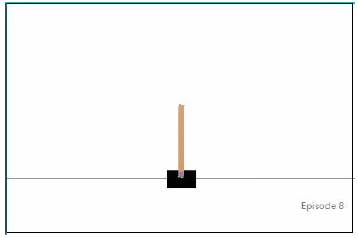

In the Cartpole environment:

-   `observation` is an array of 4 floats: 
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole 
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


# Try random actions to try and get CartPole to remain standing
The following cell is just to get Colab to render the CartPole environment

In [ ]:
# code to render the CartPole environment in Colab
!sudo apt-get install -y xvfb ffmpeg
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay

from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
from IPython.display import clear_output
from time import sleep

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()


In [ ]:
# import gym and test that the rendering works
import gym
# make the cart pole environment
env = gym.make("CartPole-v0")
env.reset()
plt.imshow(env.render(mode='rgb_array'))

Investigate the environment

Every environment comes with an `action_space` and an `observation_space`. These attributes are of type `Space`, and they describe the format of valid actions and observations:

In [ ]:
# look at the action space
print(env.action_space)

The `Discrete(2)` space above means a fixed range of non-negative numbers, so in this case valid actions are either 0 or 1.

Now let's look at the observation space:

In [ ]:
# look at the observation space
print(env.observation_space)

The Box space represents an n-dimensional box, so valid observations will be an array of 4 numbers. We can also check the Box’s bounds:

In [ ]:
# print the upper bound of the observation space
print(env.observation_space.high)
# print the lower bound of the observation space
print(env.observation_space.low)

So for the observations, there will be 4 numbers returned between the above values

`[cart position, cart velocity, pole angular position, pole angular velocity]`

`Box` and `Discrete` are the most common `Space` types

Run one episode of CartPole using random actions

In [ ]:

# the following code is the agent
# initialise the agent by setting the reward and total steps to zero and the
total_reward = 0.0
total_steps = 0
obs = env.reset()
showImage = True

step_num = 1
while True:
    clear_output()
    print('step number: %s'%(step_num))       # print out the step number of the episode
    action = env.action_space.sample()        # gets a random action from the environment (either 1 or 0)
    print('action: %s'%(action))              # print out the action we have received
    obs, reward, done, _ = env.step(action)   # execute the action via the step method
                                              # returns the observation, reward and boolean indicating if the episode has finished
                                              # (the fourth parameter is for diagnostic purposes and we do not need to know about it for this tutorial)
    print('obs: %s'%(obs))                    # print observation - array of length 4
    print('reward: %s'%(reward))              # see what the reward was (either 1 or 0)
    print('done: %s'%(done))                  # see if the environment has ended the episode i.e. you may have tipped the pole over)
                                              # (boolean: False means episode still running. True means episode ended)
    if showImage:
      plt.imshow(env.render(mode='rgb_array'))  # render the observations for demo purposes. Massively slows it down so set showImage to False to speed it up
      plt.show()                                # plot the image
      sleep(1)                                  # sleep the thread so that we can see the image
    
    total_reward += reward                    # sum the rewards                 
    total_steps += 1                          # increment total number of steps
    if done:
        break
    step_num += 1

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))


Run multiple episodes of CartPole

In [ ]:
import numpy as np

# set the number of episodes to 500
episodes = 500
# set up an empty array so that the reward for each episode can be stored
total_rewards=np.zeros(episodes)

# import the gym library
import gym

# make the cart pole environment
env = gym.make("CartPole-v0")

for episode_num in range(episodes):
  # the following code is the agent
  # initialise the agent by setting the reward and total steps to zero and the
  total_reward = 0.0
  total_steps = 0
  obs = env.reset()
  showImage = False

  n = 1
  while True:
      action = env.action_space.sample()        # gets a random action from the environment (either 1 or 0)
      obs, reward, done, _ = env.step(action)   # execute the action via the step method
                                                # returns the observation, reward and boolean indicating if the episode has finished
                                                # (the fourth parameter is for diagnostic purposes and we do not need to know about it for this tutorial)

      # print out the information in one line
      print("Episode %d, step %d, action %d, reward %d, Done=%s" % (episode_num, n, action, reward, done))

      if showImage:
        plt.imshow(env.render(mode='rgb_array'))  # render the observations for demo purposes. Massively slows it down so set showImage to False to speed it up
        plt.show()                                # plot the image
        sleep(1)                                  # sleep the thread so that we can see the image
      
      total_reward += reward                    # sum the rewards                 
      total_steps += 1                          # increment total number of steps
      if done:
          break
      n += 1

  print("Episode %d done in %d steps, total reward %.2f" % (episode_num, total_steps, total_reward))
  total_rewards[episode_num]=total_reward       # store the total reward for this episode
  episode_num += 1


Plot the reward for each episode

In [ ]:
plt.title('Reward')
plt.xlabel('Episode')
plt.ylabel('Episode Steps')
plt.plot(total_rewards)
plt.show()